In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

## Sinusoidal (cosine)
Signal frequency

Original signal

* Frequency $f_{max}=0{,}5 \text{ Hz}$
* Nyquist rate $R_{Nyquist} = 2 \cdot f_{max} = 1\text{ Hz}$ (signal property)
* Sampling rate $R = 8 \text{ Hz}$
* Nyquist frequency: $f_{Nyquist} = \frac{1}{2\Delta T} = \frac{1}{2}R = 4 \text{ Hz} ~ (> f_{max})$

The Nyquist frequency is half of the sampling frequency used to convert continuous signals into discrete samples, and it represents the highest frequency that can be accurately represented in the digital domain.

Below, the same function is represented in terms of $t$ and $n$.

sampling_time=0.125s sampling_rate=8Hz freq_nyquist=4.0Hz


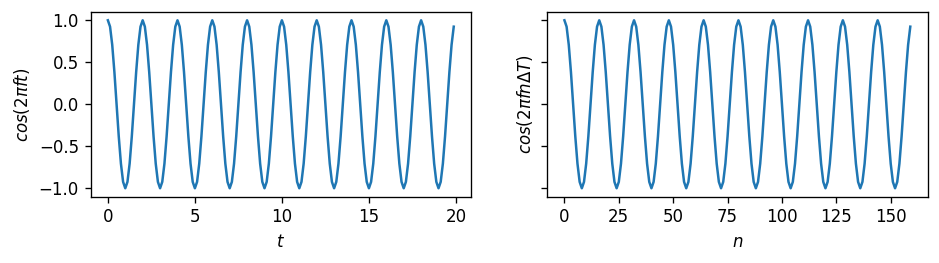

In [18]:
f_max = 0.5      # signal frequency
R = 8            # sampling rate
delta_T = 1 / R  # sampling time (interval)
T = 20           # function interval [0, T] 
M = T * R        # number of samples
t = np.linspace(0, T, M, endpoint=False)
f_n = np.cos(2 * np.pi * f_max * t) # sampled function
print(f"sampling_time={delta_T}s sampling_rate={R}Hz freq_nyquist={0.5*R}Hz")

fig, axs = plt.subplots(1, 2, figsize=(9, 2), sharey=True, dpi=120)
axs[0].plot(t, f_n)
axs[0].set_ylabel("$cos(2 \pi f t)$")
axs[0].set_xlabel("$t$")
axs[1].plot(np.arange(t.size), f_n)
axs[1].set_ylabel("$cos(2 \pi f n \Delta T)$")
axs[1].set_xlabel("$n$")
plt.show()

## Fast Discrete Fourier Transform (FFT)

DFT

$F[m] = \sum_{n=0}^{M-1} f[n] \cdot e^{-j 2 \pi m n /N}$

Inverse DFT

$f[n] = \frac{1}{M} \sum_{m=0}^{M-1} F[m] \cdot e^{j 2 \pi m n /N}$

$frequency = \frac{m}{M\Delta T} = \frac{mR}{M} \text{, } m=0, 1, \ldots, M-1$

* $M$: number of samples
* $m$: frequency bin
* $\Delta T$: sampling time
* $R$: sampling rate

More details in
https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf

In [19]:
freq_min = 1 / (M * delta_T)       # one cycle per sequence (min. freq. disregarding the DC component)
freq_max = (M - 1) / (M * delta_T) # one cycle per interval (above the Nyquist frequency)
freq_nyquist = 1 / (2 * delta_T)   # one cycle per interval (R / 2)
print(f"freq_min={freq_min:.2f}Hz freq_max={freq_max:.2f}Hz freq_nyquist={freq_nyquist:.2f}Hz")

freq_min=0.05Hz freq_max=7.95Hz freq_nyquist=4.00Hz


#### Manual DFT calculation

In [35]:
def plot_spectrum(F_m, freqs=None):
    fig, ax = plt.subplots(1, 1, figsize=(9, 2), sharey=True, dpi=120)
    amp = np.abs(F_m) # amplitude 
    M = F_m.size
    m = np.arange(M)
    if freqs is not None:
        m = freqs
    ax.bar(m, amp, width=1) # bar plot does not account for the order of freqs/amp
    ax.set_xticks(np.arange(0, M + 1, 10))
    ax.set_xlabel("$m$")
    ax.set_ylabel("$amp.$")
    plt.show()

def dft(f_n):
    M = f_n.size
    F_m = np.zeros(M)
    for m in range(M):
        F_m[m] = np.sum(f_n * np.exp(-2j * np.pi * m * np.arange(M)/M))
    return F_m

In [21]:
F_m = dft(f_n) # dft
print(F_m[:10])

[-2.64233080e-14 -1.33226763e-15 -3.78281315e-15 -2.88657986e-15
 -7.32747196e-15 -3.77475828e-15 -1.27704587e-14 -2.93098879e-14
 -2.46469511e-14 -4.08562073e-14]


/tmp/ipykernel_24010/1304281014.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  F_m[m] = np.sum(f_n * np.exp(-2j * np.pi * m * np.arange(M)/M))


The original signal has frequency $0{,}5 \text{ Hz}$ and it was sampled at $4 \text{ Hz}$, generating a total of $M=160$ samples.

The frequency bin $m$ represents a frequency $f = \frac{m}{M} R$ (i.e., $\frac{m}{M\Delta T}$), therefore, the signal frequence corresponds to $m = \frac{M}{R}f$.

* For the signal frequency, $f = 0{,}5 \text{ Hz}$, we have that $m = 10$.
* For the Nyquist frequency, $f_{Nyquist} = \frac{R}{2} = 4 \text{ Hz}$, $m = \frac{M}{2} = 80$.

In [44]:
print(f"m={int(M * f_max / R)}")

m=10


As we know, $F[M - m] = F^*[m]$. Therefore, $F[160 - 10] = F^*[10]$.

Since $F$ is real, $F = F^*$, thus, $F[160 - 10] = F[10] = 80$. The amplitude is also equal to the $F$.   

F[10]=80.00 F[150]=80.00


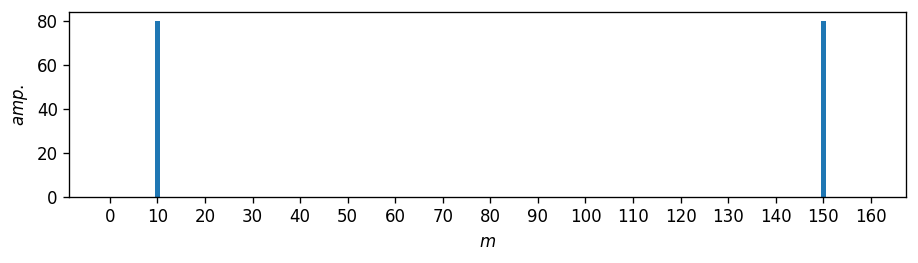

In [41]:
print(f"F[10]={F_m[10]:.2f} F[150]={F_m[150]:.2f}")
plot_spectrum(F_m)

### Peridiocity and negative frequencies

Due to the periodicity, $F[m] = F[m + kM]$, for an integer $k$.

In particular, $F[-m] = F[-m + M] = F^*[m]$  
Another property of the DFT is that $F[M - m] = $ 


In [ ]:
# plt.title("Amplitude")
# plt.xlim([0, N])
# plt.show()
# k = np.argmax(F_k[:N//2])
# print(f"signal frequency={k/(N*T)}Hz (k={k})")

In [ ]:

# plt.title("Amplitude")
# plt.xlim([0, N])
# plt.show()
# k = np.argmax(F_k[:N//2])
# print(f"signal frequency={k/(N*T)}Hz (k={k})")

Scipy calculation

(-1.7482448426734805e-14-4.984433393343798e-15j) (600+4.813040564438883e-13j) 1185


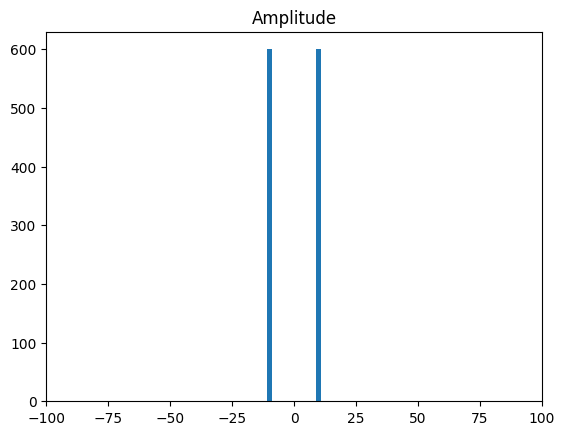

In [28]:
F_k = np.fft.fft(f_n)
print(F_k[10], F_k[1185], np.argmax(amp))
freqs = np.fft.fftfreq(t.size, t[1] - t[0])
amp = np.abs(F_k) # np.sqrt(F_u.real**2 + F_u.imag**2)
plt.bar(freqs, amp, width=2) # bar plot does not account for the order of freqs/amp
plt.title("Amplitude")
plt.xlim([-100, 100])
plt.show()

In [ ]:
F 
for k in range(N):
y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))

In [ ]:
# np.where(amp>1)
freqs

In practice, the sin contribution (imaginary part) is almost neglectable comparing to cos (real).

In [ ]:
F_u[amp>1]

Shifting the Transform

In [ ]:
amp = fftshift(amp)
freqs = fftshift(freqs)
plt.bar(freqs, amp, width=4)
plt.title("Amplitude")
plt.show()

Adding phase ($\pi/6$)

In [ ]:
phi = np.pi/6.
print(f"phase={phi}")
f_x = np.cos(2*np.pi*k*xs + phi)
plt.plot(xs, f_x)

In [ ]:
F_u = np.fft.fft(f_x)
amp = np.abs(F_u)
freqs = np.fft.fftfreq(xs.size, T)
phase = np.angle(F_u)
phase[amp < 1] = 0
print(f"phase={phase.max()}")
plt.bar(fftshift(freqs), fftshift(amp), width=4)
plt.title("Amplitude")
plt.grid()
plt.show()
plt.bar(fftshift(freqs), fftshift(phase), width=4)
plt.ylim([-np.pi/2, np.pi/2])
plt.title("Phase")
plt.grid()
plt.show()


Plot FFT on complex space (using the Euler formule). Now, both sin and cos contribute to the signal.

In [ ]:
# Separate real and imaginary parts
c = amp * np.exp(1j*phase)
c = c[amp > 1]
print(c)
# Plot the complex number
plt.scatter(c.real, c.imag, color='red', marker='x')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Plot of Complex Number')
plt.grid(True)
plt.show()

Inverse FFT

In [ ]:
# f_inv = [] 
# for k in range(N): # k (position) is used and not the x value
#     val = (1./N) * np.sum(F_u * np.exp((2j * np.pi * k * np.arange(N)) / N))
#     f_inv.append(val) # u = 1, 2, 3, ..., N - 1 
# f_inv = np.array(f_inv)

f_inv = np.fft.ifft(F_u)
print(f_inv)
plt.plot(xs, f_inv.real, label="real")
plt.plot(xs, f_inv.imag, label="imaginary")   

Relation between phase and amplitude with complex sinusoidal

In [ ]:
F_u = np.fft.fft(f_x)
amp = np.abs(F_u)
phase = np.angle(F_u)
f_inv = []
for k in range(N): # k (position) is used and not the x value
    val = (1./N) * np.sum(amp * np.exp(1j * phase) * np.exp((2j * np.pi * k * np.arange(N)) / N))
    f_inv.append(val) # u = 1, 2, 3, ..., N - 1
f_inv = np.array(f_inv)
print(f_inv)
plt.plot(xs, f_inv.real, label="real")
plt.plot(xs, f_inv.imag, label="imaginary")

Relation between phase and amplitude with **non-complex sinusoidal**

In [ ]:
phase = np.angle(F_u)
phase = phase[amp > 1]
# phase.max()
F_u[amp>1]
ks = np.arange(N)
ks[amp>1]

# f_inv = []
# for k in range(N): # k (position) is used and not the x value
#     a_n = 2 * F_u.real
#     val = np.sum(a_n * np.cos((2 * np.pi * k * np.arange(N)) / N))
#     # val = (1./N) * np.sum(amp * np.exp(1j * phase) * np.exp((2j * np.pi * k * np.arange(N)) / N))
#     f_inv.append(val) # u = 1, 2, 3, ..., N - 1
# f_inv = np.array(f_inv)
# print(f_inv)
# plt.plot(xs, f_inv.real, label="real")
# plt.plot(xs, f_inv.imag, label="imaginary")